# Inferring phospho peptides

In the following we will use AlphaQuant's proteoform analysis and combine it with deep learning predictions that give a probability how prone a certain peptide sequence is to phosphorylation. We use the combination of those two to predict phorphorylated proteoforms.

As with the standard differential expression analysis, we need:

* an input file from a proteomics search engine. We support most common search engines. Specifications on input files are given in our [README](https://github.com/MannLabs/alphaquant/blob/master/README.md#preparing-input-files).
* a sample mapping file that maps each sample to a condition (e.g.  sample 'brain_replicate_1' is mapped to condition 'brain').
* (optional) a results directory can be defined on where to save the data
* (optional) a list where we specify, which conditions we compare

Additionally, we need to specify, wether we want to perform 




In [1]:
INPUT_FILE = "./data/phospho/proteome_subset.tsv"
SAMPLEMAP_FILE = "./data/phospho/samplemap_proteome.tsv"
RESULTS_DIRECTORY = "./data/phospho/results_phospho_inference"

CONDPAIRS_LIST = [("egf_treated", "untreated")] #this means each fc is egf_treated/untreated


In [2]:
import alphaquant.run_pipeline as aq_pipeline

aq_pipeline.run_pipeline(input_file=INPUT_FILE, samplemap_file=SAMPLEMAP_FILE, results_dir=RESULTS_DIRECTORY, condpairs_list=CONDPAIRS_LIST, organism="human", 
                         perform_phospho_inference=True, cluster_threshold_pval=0.00001, take_median_ion=False, fcdiff_cutoff_clustermerge=0)

using input type spectronaut_fragion_isotopes
removed pre existing /Users/constantin/workspace/alphaquant/example_nbs/data/phospho/proteome_subset.tsv.ml_info_table.tsv
start processeing condpair ('egf_treated', 'untreated')
normalized within conditions
median 0.3736080582187675, mode 0.49142721072130446
using mode for shift
shift comparison by -0.49142721072130446
normalized between conditions
t_ion2nonan_sw 0.010475873947143555
t_intensity_selection 0.16225504875183105
t_ion2nonan_sw 0.010332822799682617
t_intensity_selection 0.15683889389038086
checked 0 of 4178 ions
checked 2000 of 4178 ions
checked 4000 of 4178 ions
checked 0 of 30 prots

condition pair ('egf_treated', 'untreated') finished!



In [3]:
import pandas as pd

proteoform_df = pd.read_csv(RESULTS_DIRECTORY + "/egf_treated_VS_untreated.proteoforms.tsv", sep='\t')
display(proteoform_df)

,protein,proteoform_id,cluster,is_reference,peptides,num_peptides,quality_score,log2fc,fraction_of_peptides,likely_phospho,fcdiff
0,CBL,CBL_0,0,True,SEQ_RPLPCTPGDCPSR_;SEQ_VPVSAPSSSDPWTGR_;SEQ_NQ...,13,0.131016,-0.167159,0.81,False,0.000000
1,CBL,CBL_1,1,False,SEQ_LPPVPSSR_;SEQ_LDLLPQR_;SEQ_ADAAEFWR_,3,0.077540,0.142678,0.19,False,0.309838
2,CDC42,CDC42_0,0,True,SEQ_TPFLLVGTQIDLR_;SEQ_NVFDEAILAALEPPEPK_;SEQ_...,5,0.532086,-0.331569,0.62,False,0.000000
3,CDC42,CDC42_1,1,False,SEQ_TCLLISYTTNK_;SEQ_WVPEITHHCPK_;SEQ_PITPETAEK_,3,0.425134,0.269623,0.38,False,0.601192
4,CDC7,CDC7_0,0,True,SEQ_TVDVLSR_;SEQ_IPLSGPVPK_;SEQ_LYEAVPQLSNVFK_...,8,0.131016,0.018931,1.00,False,0.000000
5,COMMD2,COMMD2_0,0,True,SEQ_IAVEFLR_;SEQ_MLLELSEEHK_;SEQ_LDVQLASR_;SEQ...,5,0.233512,-0.252832,1.00,True,0.000000
6,DHX34,DHX34_0,0,True,SEQ_APSEEEALEK_;SEQ_HDLAQLQAAASSAQDLSR_;SEQ_EL...,11,0.157754,-0.359909,0.50,False,0.000000
7,DHX34,DHX34_1,1,False,SEQ_AGPAPPGASDGVDIQDVK_;SEQ_EHQVVVVAGDTGCGK_;S...,11,0.131016,0.191861,0.50,False,0.551770
8,EGFR,EGFR_0,0,True,SEQ_ACGADSYEMEEDGVRK_;SEQ_ELIIEFSK_;SEQ_IPLENL...,23,0.344920,-0.052479,0.57,False,0.000000
9,EGFR,EGFR_1,1,False,SEQ_EISDGDVIISGNK_;SEQ_GSHQISLDNPDYQQDFFPK_;SE...,9,0.294786,-0.491351,0.23,True,0.438871


In [4]:
import alphaquant.utils.diffquant_utils as aq_diffquant_utils

proteoform_df_filtered = aq_diffquant_utils.filter_proteoform_df(proteoform_df=proteoform_df, min_num_peptides=1, fcdiff_cutoff=0, likely_phospho=True, keep_reference_proteoform=True)
display(proteoform_df_filtered)

,protein,proteoform_id,cluster,is_reference,peptides,num_peptides,quality_score,log2fc,fraction_of_peptides,likely_phospho,fcdiff
9,EGFR,EGFR_1,1,False,SEQ_EISDGDVIISGNK_;SEQ_GSHQISLDNPDYQQDFFPK_;SE...,9,0.294786,-0.491351,0.23,True,0.438871
11,EGFR,EGFR_3,3,False,SEQ_TPLLSSLSATSNNSTVACIDR_;SEQ_ELVEPLTPSGEAPNQ...,3,0.050802,-1.600968,0.07,True,1.548489
36,RTCB,RTCB_1,1,False,SEQ_MLQADPNK_;SEQ_EGYAWAEDK_;SEQ_LADMGIAIR_;SE...,7,0.278075,0.381294,0.29,True,0.536058
37,RTCB,RTCB_2,2,False,SEQ_LVMEEAPESYK_,1,0.211230,-0.849219,0.04,True,0.694455
47,ZFPL1,ZFPL1_1,1,False,SEQ_LCNIPLASR_;SEQ_DDDRTPGLHGDCDDDK_,2,0.014037,-0.738886,0.33,True,0.865535
8,EGFR,EGFR_0,0,True,SEQ_ACGADSYEMEEDGVRK_;SEQ_ELIIEFSK_;SEQ_IPLENL...,23,0.344920,-0.052479,0.57,False,0.000000
35,RTCB,RTCB_0,0,True,SEQ_RNLDFQDVLDK_;SEQ_VFNTTPDDLDLHVIYDVSHNIAK_;...,16,0.477273,-0.154764,0.67,True,0.000000
46,ZFPL1,ZFPL1_0,0,True,SEQ_VTNLFCFEHR_;SEQ_LATVNWAR_;SEQ_AAADSDPNLDPL...,4,0.076426,0.126649,0.67,True,0.000000


In [5]:
%reload_ext autoreload
%autoreload 2

[<Figure size 2000x1000 with 1 Axes>,
 <Figure size 1200x1000 with 1 Axes>,
 <Figure size 300x1000 with 1 Axes>]

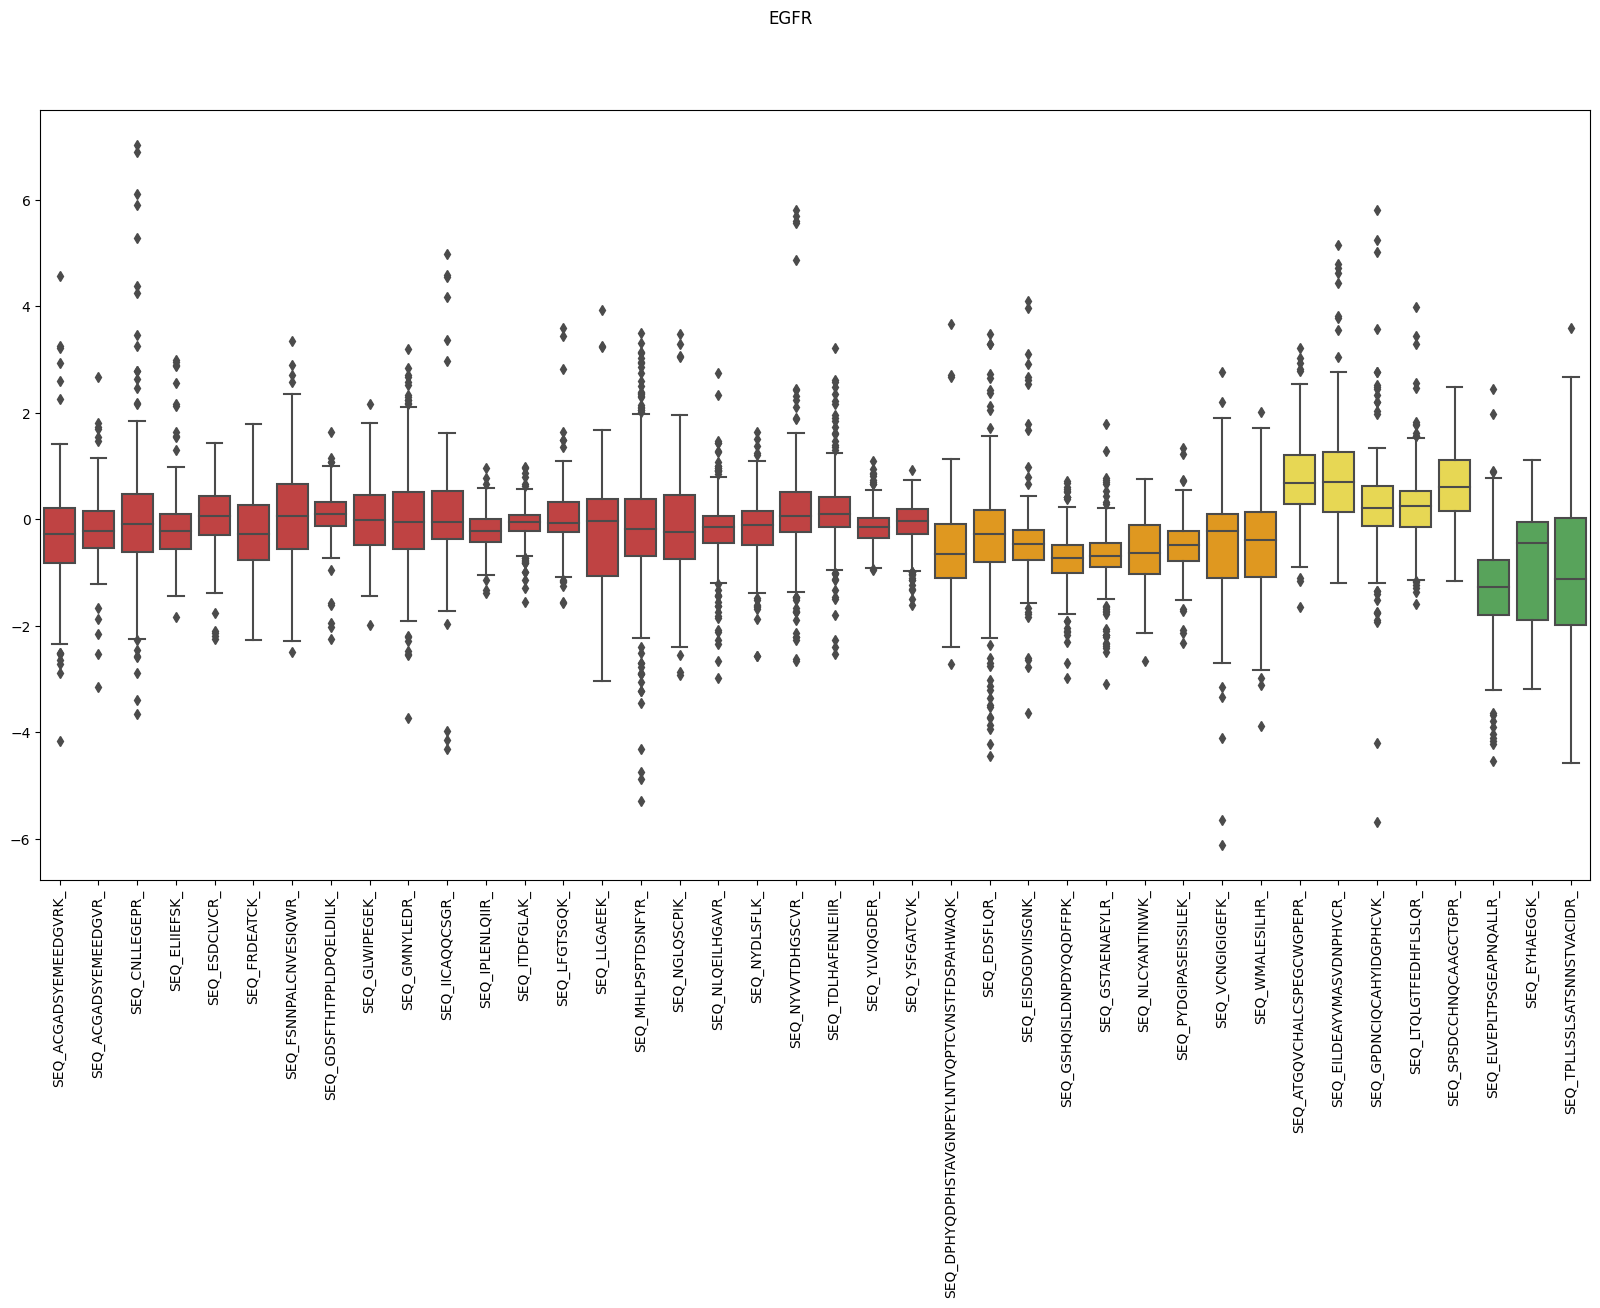

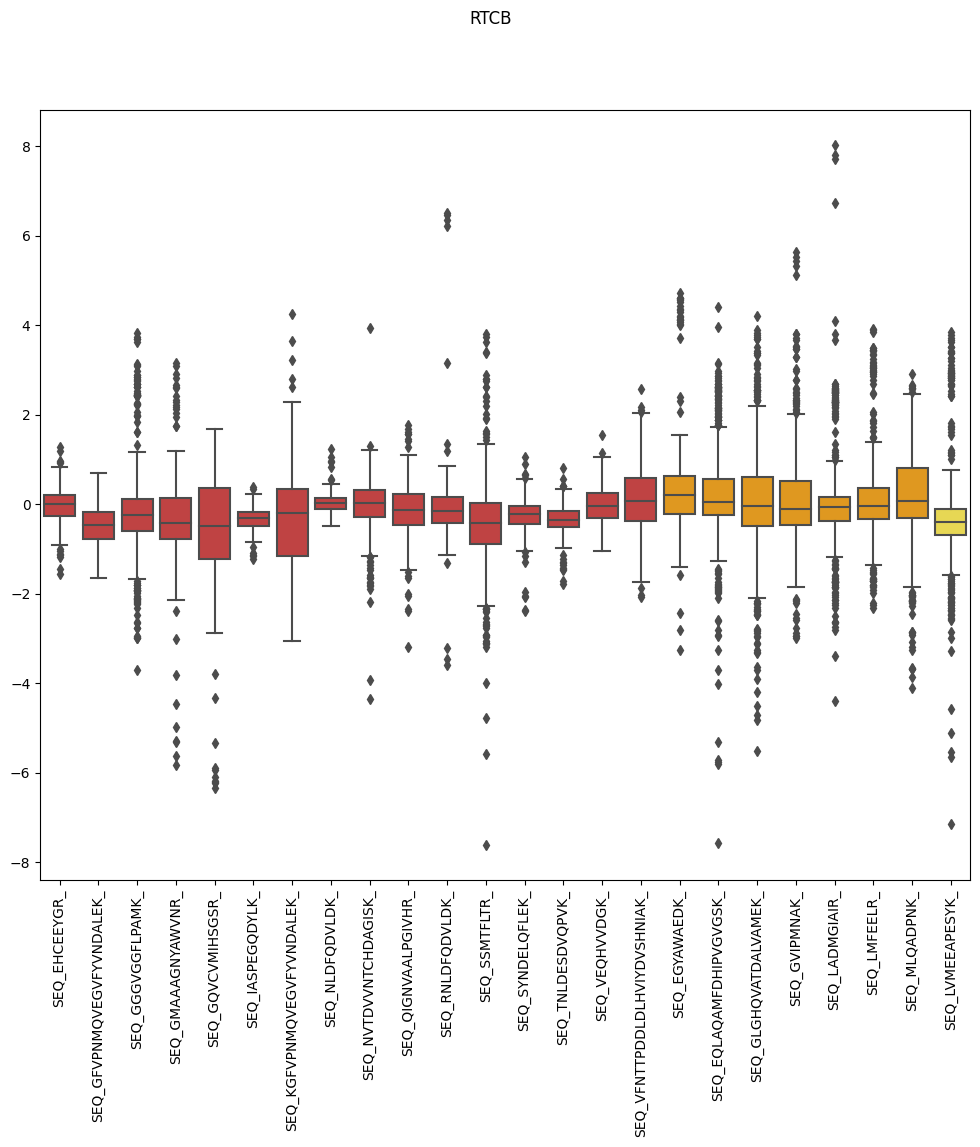

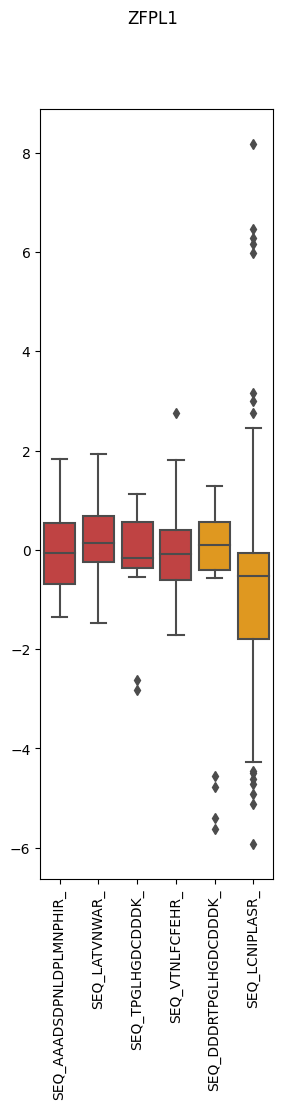

In [6]:
import alphaquant.plotting.fcviz as aq_fcviz

proteins_of_interest = proteoform_df_filtered['protein'].unique()

fc_visualizer = aq_fcviz.FoldChangeVisualizer(condition1= "egf_treated", condition2="untreated", results_directory= RESULTS_DIRECTORY, samplemap_file=SAMPLEMAP_FILE)
fc_visualizer.plot_list_of_proteins(proteins_of_interest)

In [7]:
import alphaquant.plotting.alphamapviz as aq_alphamapviz

alphamap_visualizer = aq_alphamapviz.AlphaMapVisualizer(condition1= "egf_treated", condition2="untreated", results_directory= RESULTS_DIRECTORY, samplemap_file=SAMPLEMAP_FILE, organism="Human" )

/Users/constantin/opt/anaconda3/envs/test/lib/python3.8/site-packages/alphamap/organisms_data.py:135: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  uniprot_file = pd.read_csv(os.path.join(DATA_PATH, uniprot_name))
/Users/constantin/opt/anaconda3/envs/test/lib/python3.8/site-packages/alphamap/preprocessing.py:59: UserWarning: Peptide sequence ENEEEPQSAPK could not be mached to Q15170 in the selected fasta.
  warnings.warn(f'Peptide sequence {seq} could not be mached to {prot} in the selected fasta.')


/var/folders/wb/j08kzzbd2hd8838tn3ll0jfm0000gn/T/ipykernel_33763/2977542624.py:2: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



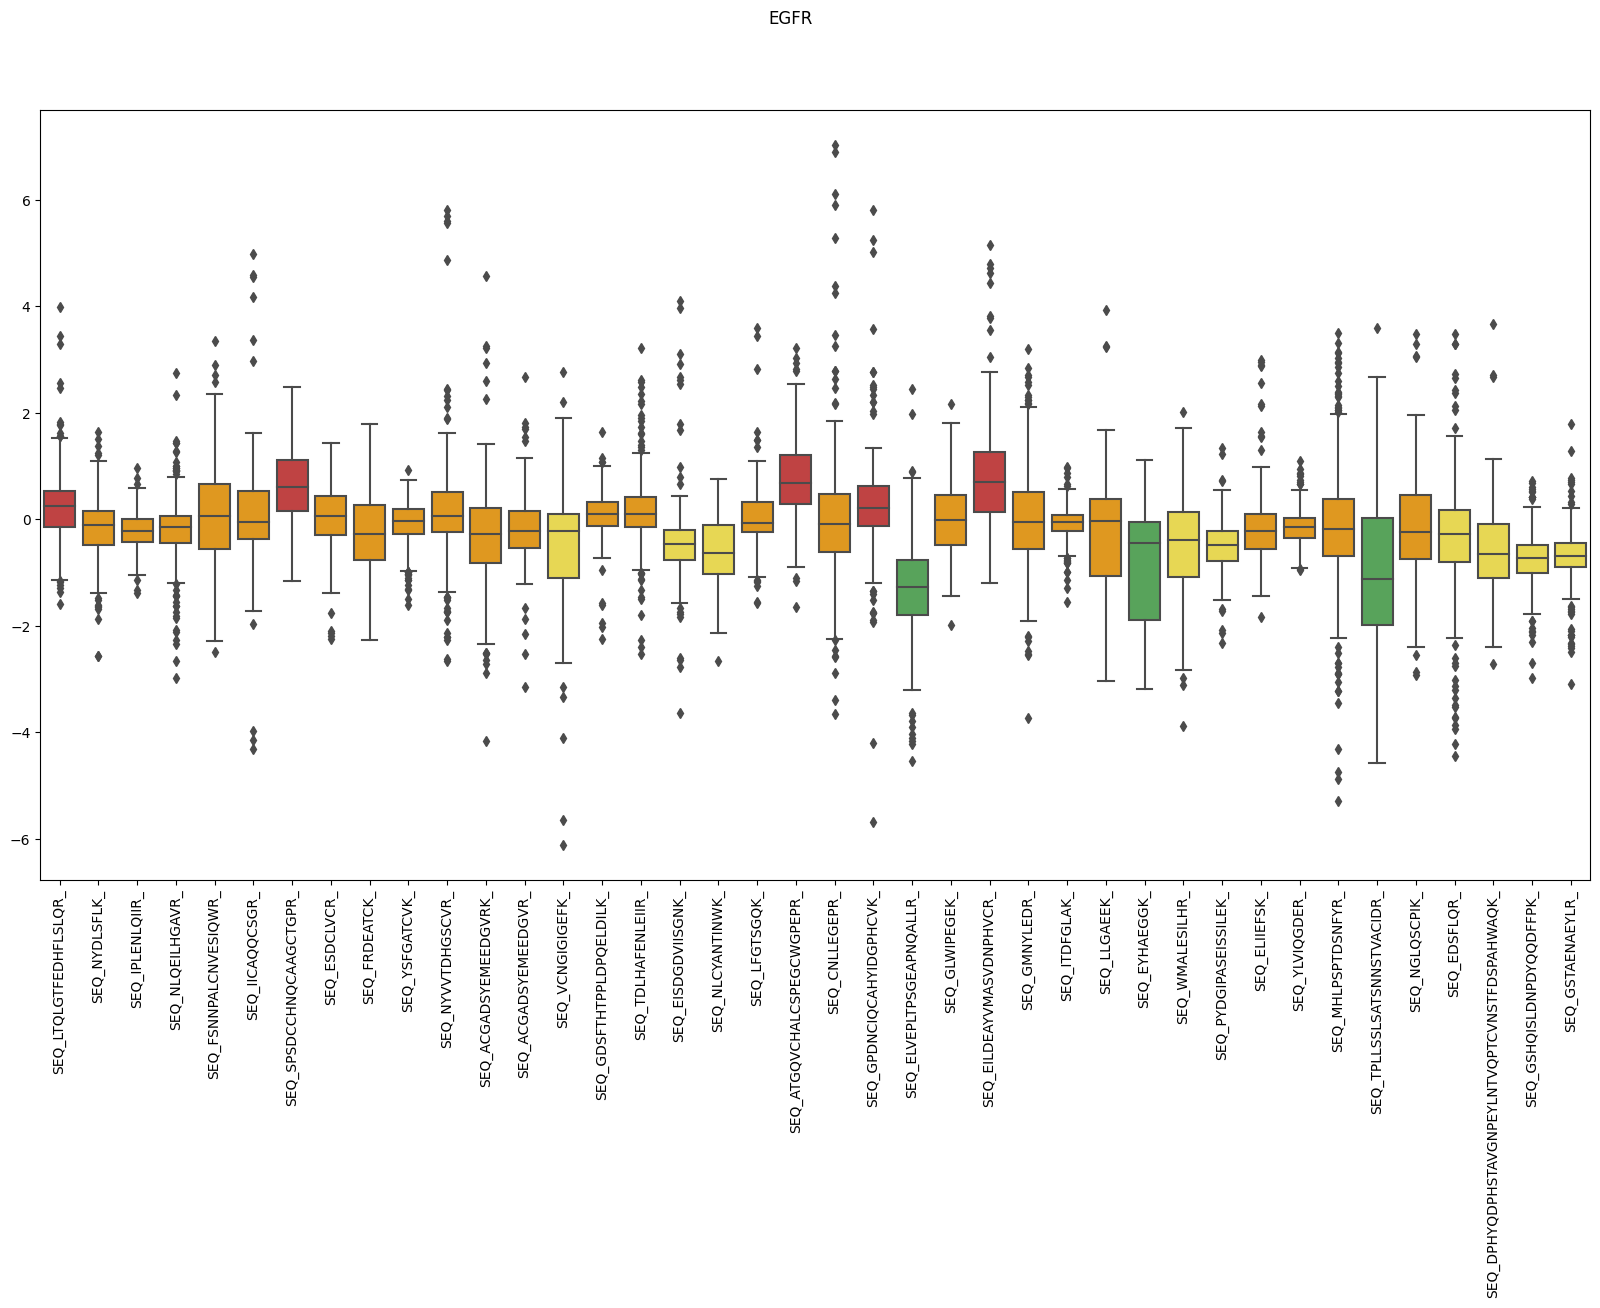

In [8]:
fc_plot, alphamap_plot = alphamap_visualizer.visualize_protein("EGFR")
fc_plot.show()
alphamap_plot.show()